In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#import dataset
df=pd.read_csv("http://cs.joensuu.fi/sipu/datasets/jain.txt",delimiter = "\t",header=None)

In [3]:
#leave true lable for calculation of accuracy in the last
df1=df.iloc[:,0:2]
A=np.array(df1)

Text(0, 0.5, 'Y')

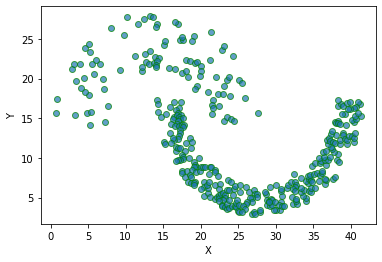

In [4]:
#plot the given  dataset.
plt.scatter(A[:,0], A[:,1], alpha=0.7, edgecolors='g')
plt.xlabel('X')
plt.ylabel('Y')

In [5]:
from sklearn.metrics import pairwise_distances
W = pairwise_distances(A, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
print(W)


[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [6]:
# def draw_graph(G):
#     pos = nx.spring_layout(G)
#     nx.draw_networkx_nodes(G, pos)
#     nx.draw_networkx_labels(G, pos)
#     nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

In [7]:
import networkx as nx
# import seaborn as sns
# sns.set()
# float_formatter = lambda x: "%.3f" % x
# np.set_printoptions(formatter={'float_kind':float_formatter})
# G = nx.random_graphs.erdos_renyi_graph(10, 0.5)
# #draw_graph(G)
# W = nx.adjacency_matrix(G)
# print(W.todense())


In [8]:
# degree matrix
D = np.diag(np.sum(np.array(W), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[12  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 37]]
laplacian matrix:
[[11 -1 -1 ...  0  0  0]
 [-1  9 -1 ...  0  0  0]
 [-1 -1 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 34 -1 -1]
 [ 0  0  0 ... -1 39 -1]
 [ 0  0  0 ... -1 -1 36]]


In [9]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[4.71844785e-15 3.00263178e-01 1.00451701e+00 2.54488061e+00
 3.74874871e+00 5.57695017e+00 6.59702218e+00 7.48029823e+00
 8.01987524e+00 8.21436844e+00 9.83257319e+00 1.03892858e+01
 1.05758993e+01 1.11682436e+01 1.13839996e+01 1.23469480e+01
 1.30124772e+01 1.39054479e+01 1.39747675e+01 1.41780490e+01
 1.48339311e+01 1.94048949e+01 1.93390065e+01 1.52099502e+01
 1.52411345e+01 1.53818900e+01 1.57192529e+01 1.59833839e+01
 1.87096217e+01 1.62302104e+01 1.64437654e+01 1.82394463e+01
 1.81375901e+01 1.80277275e+01 1.79049769e+01 1.76474932e+01
 1.67379031e+01 1.69518171e+01 1.71155816e+01 1.72340120e+01
 2.34603647e+01 2.32671233e+01 2.31655304e+01 2.27464545e+01
 2.23535520e+01 2.21137233e+01 1.99291499e+01 2.02337568e+01
 2.02710944e+01 2.17334785e+01 2.16625057e+01 2.05257752e+01
 2.07368506e+01 2.09168994e+01 2.11984639e+01 2.12600028e+01
 1.60000000e+01 2.59993708e+01 2.55475282e+01 2.51396648e+01
 2.50186462e+01 2.49008281e+01 2.46066055e+01 2.39050706e+01
 8.93734758

In [10]:
np.where(e == np.partition(e, 1)[1])# the second smallest eigenvalue


(array([1], dtype=int64),)

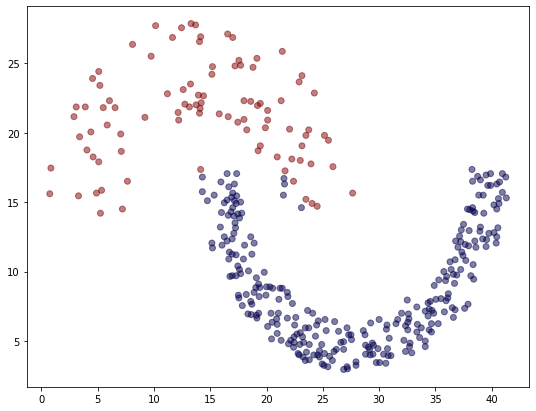

In [11]:
y_spec =v[:,1].copy()
y_spec[y_spec < 0] = 0
y_spec[y_spec > 0] = 1
type(y_spec),y_spec.shape
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(9,7))
#plt.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
plt.scatter(A[:, 0], A[:, 1],c=y_spec, alpha=0.5, cmap='seismic')
plt.show()

In [12]:
yint_spec=y_spec.astype(int)
yint_spec

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
e=[]
for i in yint_spec:
    if i==1:
        e.append(2)
    else:
        e.append(1)


In [14]:
df[2]

0      2
1      2
2      2
3      2
4      2
      ..
368    1
369    1
370    1
371    1
372    1
Name: 2, Length: 373, dtype: int64

In [15]:
# df.replace(to_replace =2,
#                  value =0,inplace=True)


In [16]:
df['3']=e

In [27]:
a=df[df[2]==df['3']]

In [32]:
a

,0,1,2,3
0,0.85,17.45,2,2
1,0.75,15.60,2,2
2,3.30,15.45,2,2
3,5.25,14.20,2,2
4,4.90,15.65,2,2
...,...,...,...,...
368,38.75,16.85,1,1
369,39.00,16.60,1,1
370,38.25,17.35,1,1
371,39.50,16.95,1,1


In [33]:
#accuracy
d=len(a)/373
print("overall accuracy of the spectral desnity function is : {}".format(d*100))

overall accuracy of the spectral desnity function is : 98.65951742627345
